# Data mining

## EXERCISE: Association analysis from scratch

[Adapted from http://aimotion.blogspot.com.au/2013/01/machine-learning-and-data-mining.html.]

[For more on efficient approaches, see http://www-users.cs.umn.edu/~kumar/dmbook/ch6.pdf.]

Refer to slides for definitions (itemset, support, frequent itemset, confidence, etc).

### Generate frequent itemsets

Let's find all sets of items with a support greater than some threshold.

We define 4 functions for generating frequent itemsets:
* createC1 - Create first candidate itemsets for k=1
* scanD - Identify itemsets that meet the support threshold
* aprioriGen - Generate the next list of candidates
* apriori - Generate all frequent itemsets

See slides for explanation of functions.

In [1]:
def createC1(dataset):
    "Create a list of candidate item sets of size one."
    c1 = []
    for transaction in dataset:
        for item in transaction:
            if not [item] in c1:
                c1.append([item])
    c1.sort()
    #frozenset because it will be a ket of a dictionary.                         
    return list(map(frozenset, c1))


def scanD(dataset, candidates, min_support):
    "Returns all candidates that meets a minimum support level"
    sscnt = {}
    for tid in dataset:
        for can in candidates:
            if can.issubset(tid):
                sscnt.setdefault(can, 0)
                sscnt[can] += 1

    num_items = float(len(dataset))
    retlist = []
    support_data = {}
    for key in sscnt:
        support = sscnt[key] / num_items
        if support >= min_support:
            retlist.insert(0, key)
        support_data[key] = support
    return retlist, support_data


def aprioriGen(freq_sets, k):
    "Generate the joint transactions from candidate sets"
    retList = []
    lenLk = len(freq_sets)
    for i in range(lenLk):
        for j in range(i + 1, lenLk):
            L1 = list(freq_sets[i])[:k - 2]
            L2 = list(freq_sets[j])[:k - 2]
            L1.sort()
            L2.sort()
            if L1 == L2:
                retList.append(freq_sets[i] | freq_sets[j]) # | is set union
    return retList


def apriori(dataset, min_support=0.5):
    "Generate a list of candidate item sets"
    C1 = createC1(dataset)
    D = list(map(set, dataset))
    L1, support_data = scanD(D, C1, min_support)
    L = [L1]
    k = 2
    while (len(L[k - 2]) > 0):
        Ck = aprioriGen(L[k - 2], k)
        Lk, supK = scanD(D, Ck, min_support)
        support_data.update(supK)
        L.append(Lk)
        k += 1

    return L, support_data

### Itemset generation on sample data

In [2]:
MIN_SUPPORT=0.5

# Sample data
DATASET = [[1, 3, 4], [2, 3, 5], [1, 2, 3, 5], [2, 5]]
print('Dataset in list-of-lists format:\n', DATASET, '\n')

# Generate a first candidate itemsets for k=1
C1 = createC1(DATASET)
print('Initial 1-itemset candidates:\n', C1, '\n')

# Convert data to a list of sets
D = list(map(set, DATASET))
print('Dataset in list-of-sets format:\n', D, '\n')

# Identify items that meet support threshold (0.5)
# Note that {4} isn't here as it only occurs in one transaction.
# Remove it so we don't generate any further candidate itemsets containing {4}.
L1, support_data = scanD(D, C1, MIN_SUPPORT)
print('1-itemsets that appear in at least 50% of transactions:\n', L1, '\n')

# Generate the next list of candidates
print('Next set of candidates:\n', aprioriGen(L1,2), '\n')

# Generate all candidate itemsets
L, support_data = apriori(DATASET, min_support=MIN_SUPPORT)
print('Full list of candidate itemsets:\n', L, '\n')
print('Support values for candidate itemsets:\n', support_data, '\n')

Dataset in list-of-lists format:
 [[1, 3, 4], [2, 3, 5], [1, 2, 3, 5], [2, 5]] 

Initial 1-itemset candidates:
 [frozenset({1}), frozenset({2}), frozenset({3}), frozenset({4}), frozenset({5})] 

Dataset in list-of-sets format:
 [{1, 3, 4}, {2, 3, 5}, {1, 2, 3, 5}, {2, 5}] 

1-itemsets that appear in at least 50% of transactions:
 [frozenset({5}), frozenset({2}), frozenset({3}), frozenset({1})] 

Next set of candidates:
 [frozenset({2, 5}), frozenset({3, 5}), frozenset({1, 5}), frozenset({2, 3}), frozenset({1, 2}), frozenset({1, 3})] 

Full list of candidate itemsets:
 [[frozenset({5}), frozenset({2}), frozenset({3}), frozenset({1})], [frozenset({2, 3}), frozenset({3, 5}), frozenset({2, 5}), frozenset({1, 3})], [frozenset({2, 3, 5})], []] 

Support values for candidate itemsets:
 {frozenset({1}): 0.5, frozenset({3}): 0.75, frozenset({4}): 0.25, frozenset({2}): 0.75, frozenset({5}): 0.75, frozenset({1, 3}): 0.5, frozenset({2, 5}): 0.75, frozenset({3, 5}): 0.5, frozenset({2, 3}): 0.5, fro

### TODO Exploring support thresholds

* Generate frequent itemsets with a support threshold of 0.7
* How many frequent itemsets do we get at 0.7?
* How many do we get at 0.3?
* What would be a reasonable value for supermarket transaction data?
* Do you have datasets that resemble transactions?
* What about the apps/websites you use?

In [3]:
# 1 - 
l0_7, sd0_7 = apriori(DATASET, min_support=0.7)
print('Full list of candidate itemsets:\n', l0_7, '\n')
print('Support values for candidate itemsets:\n', sd0_7, '\n')

# 2 - 
print('Number of frequent itemsets at 0.7:', len([i for ksets in l0_7 for i in ksets]))

# 3 - 
l0_3, sd0_3 = apriori(DATASET, min_support=0.3)
print('Number of frequent itemsets at 0.3:', len([i for ksets in l0_3 for i in ksets]))

# 4 - Much lower (e.g., 5%) to actually generate any frequent itemsets on real data

# 5 - Could imagine doing this for files to know what tends to be open at the same time.

# 6 - Many, many! E.g., Amazon, Netflix.

Full list of candidate itemsets:
 [[frozenset({5}), frozenset({2}), frozenset({3})], [frozenset({2, 5})], []] 

Support values for candidate itemsets:
 {frozenset({1}): 0.5, frozenset({3}): 0.75, frozenset({4}): 0.25, frozenset({2}): 0.75, frozenset({5}): 0.75, frozenset({2, 5}): 0.75, frozenset({3, 5}): 0.5, frozenset({2, 3}): 0.5} 

Number of frequent itemsets at 0.7: 4
Number of frequent itemsets at 0.3: 9


### Mine association rules

Given frequent itemsets, we can create association rules.

We add three more functions:
* calc_confidence - Identify rules that meet the confidence threshold
* rules_from_conseq - Recursively generate and evaluate candidate rules
* generateRules - Mine all confident association rules

See slides for explanation of functions.

In [4]:
def calc_confidence(freqSet, H, support_data, rules, min_confidence=0.7):
    "Evaluate the rule generated"
    pruned_H = []
    for conseq in H:
        conf = support_data[freqSet] / support_data[freqSet - conseq]
        if conf >= min_confidence:
            #print(freqSet - conseq, '--->', conseq, 'conf:', conf)
            rules.append((freqSet - conseq, conseq, conf))
            pruned_H.append(conseq)
    return pruned_H


def rules_from_conseq(freqSet, H, support_data, rules, min_confidence=0.7):
    "Generate a set of candidate rules"
    m = len(H[0])
    if (len(freqSet) > (m + 1)):
        Hmp1 = aprioriGen(H, m + 1)
        Hmp1 = calc_confidence(freqSet, Hmp1,  support_data, rules, min_confidence)
        if len(Hmp1) > 1:
            rules_from_conseq(freqSet, Hmp1, support_data, rules, min_confidence)

def generateRules(L, support_data, min_confidence=0.7):
    """Create the association rules
    L: list of frequent item sets
    support_data: support data for those itemsets
    min_confidence: minimum confidence threshold
    """
    rules = []
    for i in range(1, len(L)):
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]
            print("freqSet", freqSet, 'H1', H1)
            if (i > 1):
                rules_from_conseq(freqSet, H1, support_data, rules, min_confidence)
            else:
                calc_confidence(freqSet, H1, support_data, rules, min_confidence)
    return rules

def print_rules(rules):
    for r in rules:
        print('{} ==> {} (c={})'.format(*r))

### Rule mining on sample data

In [5]:
MIN_CONFIDENCE=0.7

# Mine association rules
association_rules = generateRules(L, support_data, min_confidence=MIN_CONFIDENCE)
print_rules(association_rules)

freqSet frozenset({2, 3}) H1 [frozenset({2}), frozenset({3})]
freqSet frozenset({3, 5}) H1 [frozenset({3}), frozenset({5})]
freqSet frozenset({2, 5}) H1 [frozenset({2}), frozenset({5})]
freqSet frozenset({1, 3}) H1 [frozenset({1}), frozenset({3})]
freqSet frozenset({2, 3, 5}) H1 [frozenset({2}), frozenset({3}), frozenset({5})]
frozenset({5}) ==> frozenset({2}) (c=1.0)
frozenset({2}) ==> frozenset({5}) (c=1.0)
frozenset({1}) ==> frozenset({3}) (c=1.0)


### TODO Exploring confidence thresholds

* Mine rules with a confidence threshold of 0.9
* How many rules do we get at 0.9?
* How many do we get at 0.5?
* What would be a reasonable value for supermarket transaction data?
* Can we use this for recommendation (e.g., Amazon, Netflix)?

In [6]:
# 1 - 
r0_9 =  generateRules(L, support_data, min_confidence=0.9)
print('Rules for confidence threshold of 0.9:')
print_rules(r0_9)

# 2 - 
print('Number of rules at 0.9:', len(r0_9))

# 3 - 
r0_5 =  generateRules(L, support_data, min_confidence=0.5)
print('Rules for confidence threshold of 0.5:')
print_rules(r0_5)
print('Number of rules at 0.5:', len(r0_5))

# 4 - 70% might be reasonable; it will depend on the data and how many rules the business can use

# 5 - Absolutely, especially in session-focused recommendation ignoring user profile and history.
#     [https://en.wikipedia.org/wiki/Recommender_system]
#     [https://www.quora.com/How-does-Amazons-collaborative-filtering-recommendation-engine-work]

freqSet frozenset({2, 3}) H1 [frozenset({2}), frozenset({3})]
freqSet frozenset({3, 5}) H1 [frozenset({3}), frozenset({5})]
freqSet frozenset({2, 5}) H1 [frozenset({2}), frozenset({5})]
freqSet frozenset({1, 3}) H1 [frozenset({1}), frozenset({3})]
freqSet frozenset({2, 3, 5}) H1 [frozenset({2}), frozenset({3}), frozenset({5})]
Rules for confidence threshold of 0.9:
frozenset({5}) ==> frozenset({2}) (c=1.0)
frozenset({2}) ==> frozenset({5}) (c=1.0)
frozenset({1}) ==> frozenset({3}) (c=1.0)
Number of rules at 0.9: 3
freqSet frozenset({2, 3}) H1 [frozenset({2}), frozenset({3})]
freqSet frozenset({3, 5}) H1 [frozenset({3}), frozenset({5})]
freqSet frozenset({2, 5}) H1 [frozenset({2}), frozenset({5})]
freqSet frozenset({1, 3}) H1 [frozenset({1}), frozenset({3})]
freqSet frozenset({2, 3, 5}) H1 [frozenset({2}), frozenset({3}), frozenset({5})]
Rules for confidence threshold of 0.5:
frozenset({3}) ==> frozenset({2}) (c=0.6666666666666666)
frozenset({2}) ==> frozenset({3}) (c=0.6666666666666666

## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE: Clustering with k-means

[Adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#example-cluster-plot-kmeans-digits-py]

### Loading handwritten digits data

We'll work with the handwritten digits dataset, a classic machine-learning dataset used to explore automatic recognition of handwritten digits (i.e., 0, 1, 2, ..., 9).

For more information:
* http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits
* http://scikit-learn.org/stable/tutorial/basic/tutorial.html#loading-an-example-dataset

The digits data comprises 1797 64-dimensional representations of handwritten digits:
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]

It also includes labels:
[0 1 2 ..., 8 9 8]

And it includes the original 8x8 image representation:
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]

Let's look at a few images:



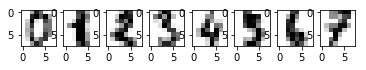

In [7]:
%matplotlib inline
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

print('The digits data comprises {} {}-dimensional representations of handwritten digits:\n{}\n'.format(
        digits.data.shape[0],
        digits.data.shape[1],
        digits.data
    ))

print('It also includes labels:\n{}\n'.format(digits.target))

print('And it includes the original 8x8 image representation:\n{}\n'.format(digits.images[0]))

print('Let\'s look at a few images:\n')
NUM_SUBPLOT_ROWS = 1
NUM_SUBPLOT_COLS = 8
for i in range(NUM_SUBPLOT_ROWS*NUM_SUBPLOT_COLS):
    _ = plt.subplot(NUM_SUBPLOT_ROWS,NUM_SUBPLOT_COLS,i+1)
    _ = plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')

### Clustering handwritten digits

That's the data. Now let's try clustering these 64d vectors.

`scikit-learn` implements many differnt machine learning algorithms.

The normal pattern is to:
1. intialise an estimator (e.g., `estimator = KMeans()`)
1. fit to the training data (e.g., `estimator.fit(training_data)`)
1. label the test data (e.g., `estimator.predict(test_data)`)

For clustering, we don't have separate training and test data.

So the labelling is created when we fit and accessed by `estimator.labels_`. Note that, for clustering, these are cluster IDs. They are NOT labels.

`estimator.inertia_` gives the sum of squared errors (SSE).

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import numpy as np

# First let's scale the digits data (center to mean and scale to unit variance)
data = scale(digits.data)
print('Scaled digits data:\n{}\n'.format(data))

# Let's grab the data we'll need
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target)) # classes
labels = digits.target

# And let's run k-means, specifying initialisation (k-means++), k (n_digits),
# and the number of runs (10)
estimator = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
estimator.fit(data)
print('Sum of squared errors:', estimator.inertia_)
print('Clusters from k-means:', estimator.labels_[:10])
print('Gold standard classes:', labels[:10])

Scaled digits data:
[[ 0.         -0.33501649 -0.04308102 ..., -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...,  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...,  1.56568555  1.6951369
  -0.19600752]
 ..., 
 [ 0.         -0.33501649 -0.88456568 ..., -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...,  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...,  0.8876023  -0.26113572
  -0.19600752]]

Sum of squared errors: 69404.8763016
Clusters from k-means: [8 3 3 5 7 5 1 0 5 5]
Gold standard classes: [0 1 2 3 4 5 6 7 8 9]


### TODO Try different initialisations

Initialisation has a large effect on cluster output. Let's try a few options.

* Initialise with random (`init='random'`)
* Run PCA with k components (`pca = PCA(n_components=n_digits).fit(data)`)
* Use PCA components to initialise `KMeans` (`init=pca.components_`)
* Can we determine which approach is best?

In [10]:
# 1 - 
est_random = KMeans(init='random', n_clusters=n_digits, n_init=10)
est_random.fit(data)
print('RANDOM INITIALISATION')
print('Num of squared errors:', est_random.inertia_)
print('Clusters from k-means:', est_random.labels_[:10])
print('Gold standard classes:', labels[:10])
print('')

# 2 - 
from sklearn.decomposition import PCA
pca = PCA(n_components=n_digits).fit(data)

# 3 - 
est_pca = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
est_pca.fit(data)
print('INITIALISATION WITH PCA COMPONENTS')
print('Num of squared errors:', est_pca.inertia_)
print('Clusters from k-means:', est_pca.labels_[:10])
print('Gold standard classes:', labels[:10])
print('')

# 4 - It looks like k-means++ >> random >> PCA from SSE/inertia.
#     But SSE is an internal validation measure.
#     Since we're trying to cluster by digit, we can't really say
#     which is best without comparing to the gold partition.

RANDOM INITIALISATION
Num of squared errors: 69408.8731399
Clusters from k-means: [8 7 3 2 6 2 1 4 2 2]
Gold standard classes: [0 1 2 3 4 5 6 7 8 9]

INITIALISATION WITH PCA COMPONENTS
Num of squared errors: 70768.3362457
Clusters from k-means: [3 2 2 9 0 9 4 1 9 9]
Gold standard classes: [0 1 2 3 4 5 6 7 8 9]



## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE: Evaluating clustering

Since we have a gold-standard labels, we can compare our system clustering to the true partition.

`scikit-learn` includes various metrics for this:
* Homogeneity
* Completeness
* V-measure
* Adjusted Rand index (ARI)
* Adjusted mutual information (AMI)
* Silhouette coefficient

For more information:
* http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

Let's compare the above clusterings using V-measure.

Note that you may need to re-estimate or rename `est_random` and `est_pca` from the last exercise

In [11]:
from sklearn import metrics
print('k-means++ initialisation:', metrics.v_measure_score(labels, estimator.labels_))
print('random initialisation:   ', metrics.v_measure_score(labels, est_random.labels_))
print('pca initialisation:      ', metrics.v_measure_score(labels, est_pca.labels_))

k-means++ initialisation: 0.624915522408
random initialisation:    0.62445308121
pca initialisation:       0.681049370081


### Comparing initialisations

Let's be a bit more exhastive, comparing initialisations using variuos evaluation metrics.

In [12]:
from time import time

sample_size = 300

def bench_k_means(estimator, name, data):
    "Calculate various metrics for comparing system clustering to a gold partition"
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

# print table header
print(75 * '_')
print('init         time  inertia    homo   compl  v-meas     ARI     AMI silhouet')
print(75 * '_')

# benchmark k-means++ initialisation
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

# benchmark random initialisation
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# benchmark PCA initalisation
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)

print(75 * '_')

___________________________________________________________________________
init         time  inertia    homo   compl  v-meas     ARI     AMI silhouet
___________________________________________________________________________
k-means++   0.31s    69676   0.679   0.718   0.698   0.572   0.676    0.143
   random   0.20s    69419   0.605   0.653   0.628   0.468   0.601    0.147
PCA-based   0.07s    70768   0.668   0.695   0.681   0.558   0.665    0.157
___________________________________________________________________________


### TODO Reading evaluation output

- Which approach performs best? How would you order the other two?
- Do you neighbours get the same result?
- Can we apply statistical significance testing?
- How else can we test reliability?

In [ ]:
# 1 - PCA > random, PCA > k-means++, hard to say for random and k-means++

# 2 - Run multiple times, k-means clustering depends on initialisation and changes

# 3 - Not directly to the clustering output. Clustering is often more of an exploratory tool.

# 4 - A few possibilities..
#     We could evaluate the impact of different clusterings on another task.
#     We could do a bootstrap stability analysis
#     (http://www.r-bloggers.com/bootstrap-evaluation-of-clusters/).
#     We could use cophenitic correlation for hierarchical clustering
#     (https://en.wikipedia.org/wiki/Cophenetic_correlation).

## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE: Choosing k

### Create example data for choosing k

First, let's create some example data with 4 clusters using make_blobs.

We set `random_state=1` so we all get the same clusters.

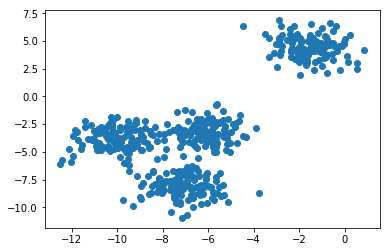

In [13]:
from sklearn.datasets import make_blobs

# Generating the sample data from make_blobs
# This particular setting has one distict cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
d1 = X[:,0] # first dimension
d2 = X[:,1] # second dimension
_ = plt.scatter(d1,d2)

### Choosing k using silhouette analysis

[Adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html]

For good clusterings:
* the average silhouette should be close to 1 indicating that points are far away from neighbouring clusters 
* all cluster silhouettes should be close to the average silhouette score

For n_clusters = 2 The average silhouette_score is : 0.704978749608


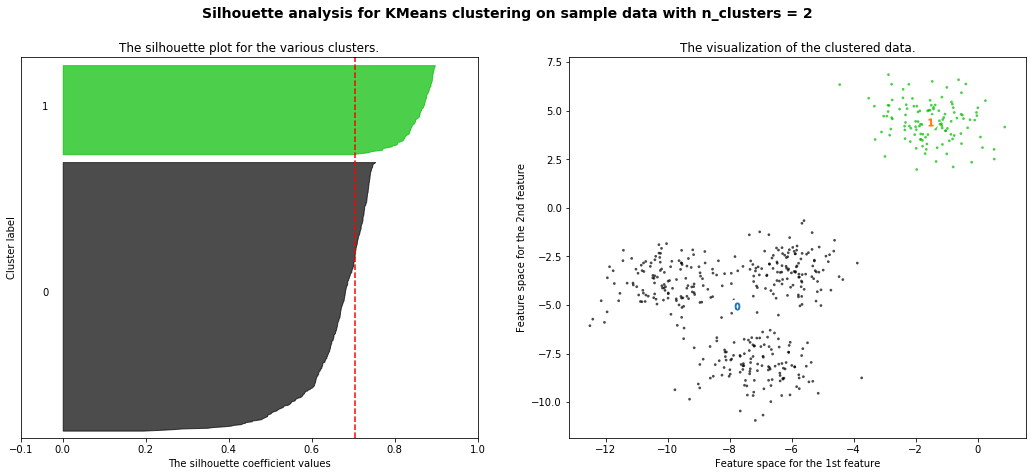

For n_clusters = 3 The average silhouette_score is : 0.588200401213


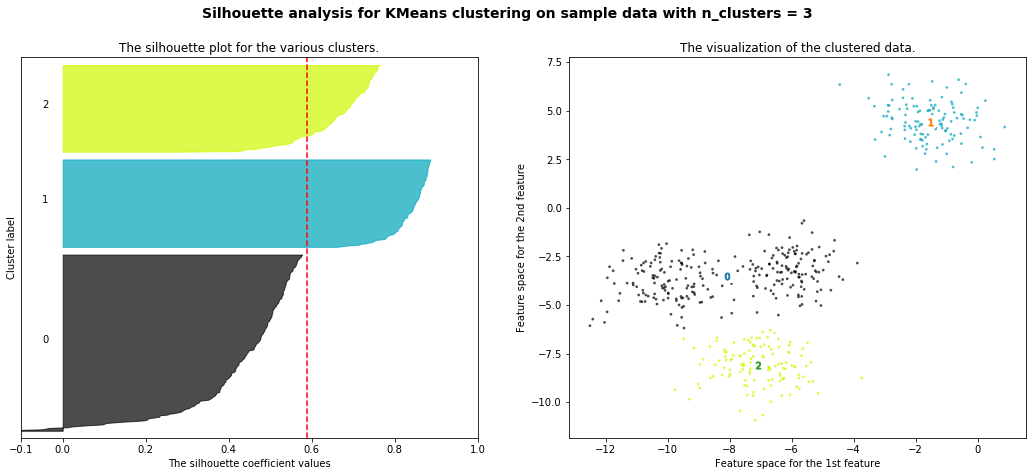

For n_clusters = 4 The average silhouette_score is : 0.650518663273


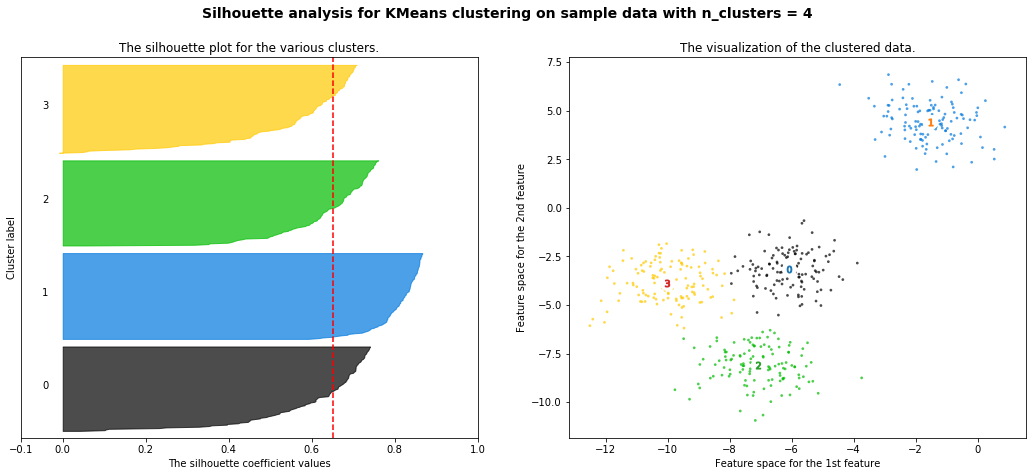

For n_clusters = 5 The average silhouette_score is : 0.563764690262


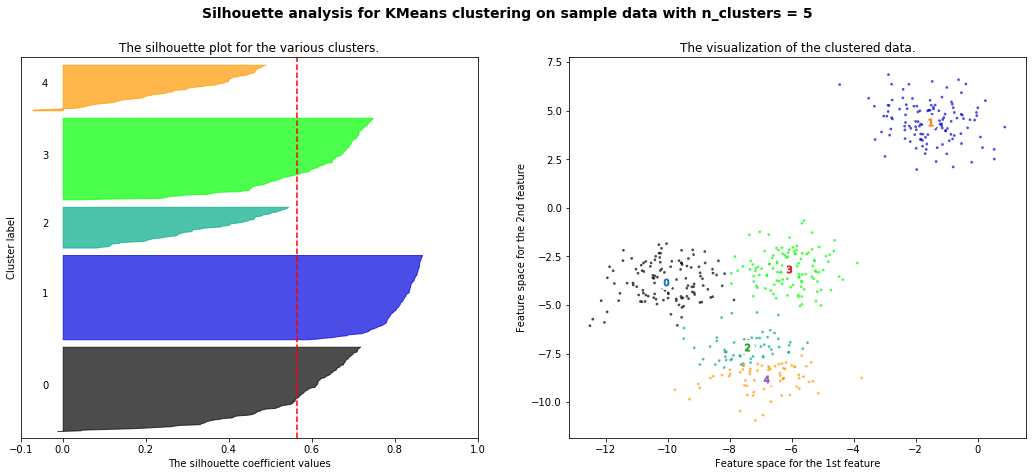

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2,6)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()


### TODO Choosing k

[Derived from Data Science from Scratch, Chapter 19]

The textbook suggests another interactive approach for choosing the number of clusters: plot SSE versus k and looking for the knee (the point where the graph bends).

- Plot inertia against k for k from 2 to 6
- What k would you choose for each? Is it the same?
- Does this work on the handwritten digits code? Why / why not?

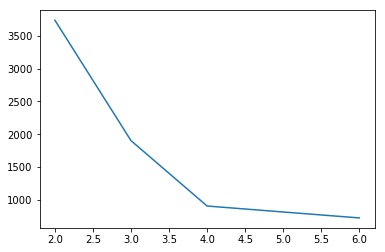

In [16]:
# 1 -
range_n_clusters = [2, 3, 4, 5, 6]
inertia_values = [KMeans(n_clusters=k).fit(X).inertia_ for k in range_n_clusters]
_ = plt.plot(range_n_clusters, inertia_values)

# 2 - From this plot, it looks like the knee is at 4 or maybe 3

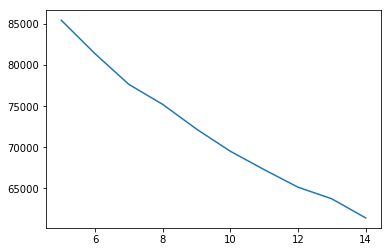

In [17]:
# 3 - Nope. The handwritten digits data is difficult to cluster.
#     However, we haven't done anything clever with our feature representation.
#     We might do better, e.g., with spectral clustering
#     (http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering).
#     Q: Does spectral clustering outperform 
#     We leave this as an extra exercise for the keen reader.
range_n_clusters = range(5,15)
inertia_values = [KMeans(n_clusters=k).fit(data).inertia_ for k in range_n_clusters]
_ = plt.plot(range_n_clusters, inertia_values)